# Final Project - Stage 2
## Data Preprocessing - Data Set E-Commerce Shipping
## Kelompok 8 : Decentraland
**Anggota Kelompok:**
- Dharma Setiawan
- Ilham Ibnu A.
- M. Farhan Atmawinanda
- Fikri Diva S.
- Ahmad Ilham H.

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [ ]:
url_dataset = "https://raw.githubusercontent.com/Decentraland-Team-Final-Project/Report-Final-Project-/main/Dataset/E-Commerce%20Shipping%20Data.csv"
df_shipping = pd.read_csv(url_dataset)
df_shipping.head()

ID Warehouse_block  ... Weight_in_gms  Reached.on.Time_Y.N
0   1               D  ...          1233                    1
1   2               F  ...          3088                    1
2   3               A  ...          3374                    1
3   4               B  ...          1177                    1
4   5               C  ...          2484                    1

[5 rows x 12 columns]

In [ ]:
# info semua variabel pada dataset
df_shipping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [ ]:
# cek missing value
df_shipping.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [ ]:
# cek duplicated data
df_shipping.duplicated().sum()

0

In [ ]:
# Drop columns ID
df_shipping.drop(columns="ID", inplace=True)

In [ ]:
# Split data category and numeric
category = df_shipping.select_dtypes(include='object')
numerical = df_shipping.select_dtypes(exclude='object')

numerical_cols = numerical.columns.to_list()
category_cols = category.columns.to_list()

print("Data numerik: ", numerical_cols)
print("Data category: ", category_cols)

Data numerik:  ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N']
Data category:  ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']


## Descriptive Statistik

In [ ]:
# Descriptive statistik untuk numeric data
df_shipping[numerical_cols].describe()

Customer_care_calls  Customer_rating  ...  Weight_in_gms  Reached.on.Time_Y.N
count         10999.000000     10999.000000  ...   10999.000000         10999.000000
mean              4.054459         2.990545  ...    3634.016729             0.596691
std               1.141490         1.413603  ...    1635.377251             0.490584
min               2.000000         1.000000  ...    1001.000000             0.000000
25%               3.000000         2.000000  ...    1839.500000             0.000000
50%               4.000000         3.000000  ...    4149.000000             1.000000
75%               5.000000         4.000000  ...    5050.000000             1.000000
max               7.000000         5.000000  ...    7846.000000             1.000000

[8 rows x 7 columns]

In [ ]:
# Descriptive statistik untuk kategorikal data
df_shipping[category_cols].describe()

Warehouse_block Mode_of_Shipment Product_importance Gender
count            10999            10999              10999  10999
unique               5                3                  3      2
top                  F             Ship                low      F
freq              3666             7462               5297   5545

## Remove Outlier

### Remove outlier using z-score

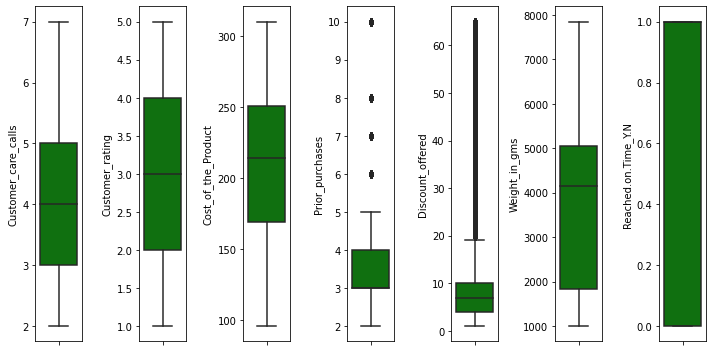

In [ ]:
# sebelum menghapus data outlier
plt.figure(figsize=(10,5))
for i in range(0, len(numerical_cols)):
  plt.subplot(1, len(numerical_cols), i+1)
  sns.boxplot(y=df_shipping[numerical_cols[i]], color='green', orient='v')
  plt.tight_layout()

In [ ]:
from scipy import stats

df_ship1 = df_shipping.copy()

print(f'Jumlah baris sebelum memfilter outlier: {len(df_ship1)}')

filtered_entries = np.array([True] * len(df_ship1))

for col in numerical_cols:
    zscore = abs(stats.zscore(df_ship1[col])) # hitung absolute z-scorenya
    filtered_entries = (zscore < 3) & filtered_entries # keep yang kurang dari 3 absolute z-scorenya
    
df_ship1 = df_ship1[filtered_entries] # filter, cuma ambil yang z-scorenya dibawah 3

print(f'Jumlah baris setelah memfilter outlier: {len(df_ship1)}')

Jumlah baris sebelum memfilter outlier: 10999
Jumlah baris setelah memfilter outlier: 10642


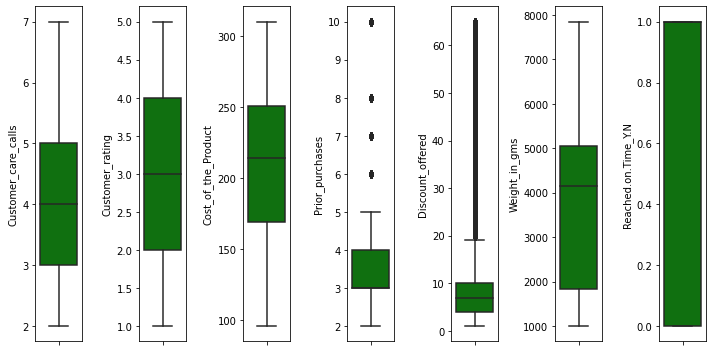

In [ ]:
# sebelum menghapus data outlier
plt.figure(figsize=(10,5))
for i in range(0, len(numerical_cols)):
  plt.subplot(1, len(numerical_cols), i+1)
  sns.boxplot(y=df_shipping[numerical_cols[i]], color='green', orient='v')
  plt.tight_layout()

### Remove outlier using IQR

In [ ]:
df_ship2 = df_shipping.copy()

print(f'Jumlah baris sebelum memfilter outlier: {len(df_ship2)}')

Q1 = df_ship2['Discount_offered'].quantile(0.25)
Q3 = df_ship2['Discount_offered'].quantile(0.75)
IQR = Q3 - Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((df_ship2['Discount_offered'] >= low_limit) & (df_ship2['Discount_offered'] <= high_limit))
df_ship2 = df_ship2[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_ship2)}')

Jumlah baris sebelum memfilter outlier: 10999
Jumlah baris setelah memfilter outlier: 8790


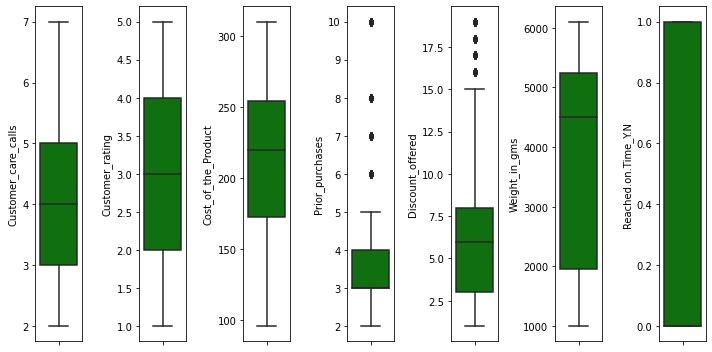

In [ ]:
plt.figure(figsize=(10,5))
for i in range(0, len(numerical_cols)):
  plt.subplot(1, len(numerical_cols), i+1)
  sns.boxplot(y=df_ship2[numerical_cols[i]], color='green', orient='v')
  plt.tight_layout()

## Label Encoding

In [ ]:
#Label encoding
mapping_gender = {
    'F' : 0,
    'M' : 1
}

mapping_product_importance = {
    'low' : 0,
    'medium' : 1,
    'high' : 2,
}

df_ship2['Gender(num)'] = df_ship2['Gender'].map(mapping_gender)
df_ship2['Product_Importance(num)'] = df_ship2['Product_importance'].map(mapping_product_importance)

In [ ]:
df_ship2.drop(columns=["Gender", "Product_importance"], inplace=True)

In [ ]:
df_ship2[["Gender(num)", "Product_Importance(num)"]].head(10)

Gender(num)  Product_Importance(num)
3             1                        1
5             0                        1
6             0                        0
8             0                        0
10            1                        1
12            0                        1
16            0                        1
18            1                        2
22            1                        0
23            1                        2

## One hot encoding

In [ ]:
df_ship2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 3 to 10998
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Warehouse_block          8790 non-null   object
 1   Mode_of_Shipment         8790 non-null   object
 2   Customer_care_calls      8790 non-null   int64 
 3   Customer_rating          8790 non-null   int64 
 4   Cost_of_the_Product      8790 non-null   int64 
 5   Prior_purchases          8790 non-null   int64 
 6   Discount_offered         8790 non-null   int64 
 7   Weight_in_gms            8790 non-null   int64 
 8   Reached.on.Time_Y.N      8790 non-null   int64 
 9   Gender(num)              8790 non-null   int64 
 10  Product_Importance(num)  8790 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 824.1+ KB


In [ ]:
for cat in ['Warehouse_block', 'Mode_of_Shipment']:
    onehots = pd.get_dummies(df_ship2[cat], prefix=cat, drop_first=True)
    df_ship2 = df_ship2.join(onehots)

In [ ]:
df_ship2[["Warehouse_block_B", "Warehouse_block_C",	"Warehouse_block_D",	"Warehouse_block_F",	"Mode_of_Shipment_Road"	,"Mode_of_Shipment_Ship"]].head(10)

Warehouse_block_B  ...  Mode_of_Shipment_Ship
3                   1  ...                      0
5                   0  ...                      0
6                   0  ...                      0
8                   0  ...                      0
10                  0  ...                      0
12                  0  ...                      0
16                  0  ...                      0
18                  0  ...                      1
22                  0  ...                      1
23                  0  ...                      1

[10 rows x 6 columns]

In [ ]:
df_ship2.drop(columns=['Warehouse_block', 'Mode_of_Shipment'], inplace=True)

In [ ]:
df_ship2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 3 to 10998
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Customer_care_calls      8790 non-null   int64
 1   Customer_rating          8790 non-null   int64
 2   Cost_of_the_Product      8790 non-null   int64
 3   Prior_purchases          8790 non-null   int64
 4   Discount_offered         8790 non-null   int64
 5   Weight_in_gms            8790 non-null   int64
 6   Reached.on.Time_Y.N      8790 non-null   int64
 7   Gender(num)              8790 non-null   int64
 8   Product_Importance(num)  8790 non-null   int64
 9   Warehouse_block_B        8790 non-null   uint8
 10  Warehouse_block_C        8790 non-null   uint8
 11  Warehouse_block_D        8790 non-null   uint8
 12  Warehouse_block_F        8790 non-null   uint8
 13  Mode_of_Shipment_Road    8790 non-null   uint8
 14  Mode_of_Shipment_Ship    8790 non-null   uint8
dtypes: 